# <a class="anchor" id=0.></a> Contents

* [1.Aim of the Kernel](#1.)
* [2. Elementary Cellular Automata](#2.)
* [3. Coding Elementary Cellular Automata from Scratch](#3.)
* * [3.1. CA_Grid class](#3.1.)
* * [3.2. Elementary_CA class](#3.2.)
* * [3.3. Demonstrate_CA class](#3.3.)
* * [3.4. Show Cellular Automata Patterns for Rules](#3.4.)
* [4. Totalistic Cellular Automata](#4.)
* * [4.1. Totalistic_CA_Grid class](#4.1.)
* * [4.2.Totalistic_CA class](#4.2.)
* * [4.3. Show  Patterns for Totalistic Rules](#4.3.)

[Go to Contents Menu](#0.)

# <a class="anchor" id=1.> </a>1. Aim of the Kernel

Aim of this kernel is to introduce  cellular automata and its demostration with python code. 

Jon von Neumann proposed the concept of Cellular Automata(CA), a model of computation for the functioning of computers to model the self-renewal of biological organisms.

CA consists of rules that determine the transition of cells in the grid plane from one state to another. There are a discrete number of states that are proportional to the number of cells that the cell is interacting with. When the rules are applied to a specified number of cells, the cells chage from one state to another, or remain in the same state.

Different dimension of cellular automata are designed by researchers. CA  designed in two dimensions when first proposed by Neumman. Then one-dimensional and three-dimensional CA types were proposed. 


[Go to Contents Menu](#0.)

<a class="anchor" id=2.>2. Cellular Automata Basics</a>

An important feature of CA is that its behavior can be shown in a visual way. CA works on a grid plane of cells whose colors are black or white. The state of the cells corresponds to the values of 1 or 0 in the context of the color value in black or white respectively. The next state of each cell is determined by states of its left neighbor, the right neighbor, and its own. It would be useful to examine Figure 1 to better understand the concept of state of cells.

![2](http://i.hizliresim.com/P1rZj9.png)
Figure 1. Next states of a cell depend on Rule 254

The figure above consists of eight separate small shapes. Each small shape consists of three cells on top and one cell below them. For two-state cellular automata, there are eight different states that three cells can have. When three cells at the top are examined, eight different color sequences are seen. The single cell located under the three cells represents the next state of the cell in the middle of the three cells.

For Figure 1, the following state of the middle cell can be obtained simply: If the state of one of the three cells is black, the next state of the middle cell becomes black. CA, consisting of three neighboring and two states, can, however, determine the next state according to 256 different way. It is impossible to make a definition for each state transition. There is a better way to do this. A rule number is given for each different state transition.

The rule number is determined by the state of the eight underlying cells in the Figure 1. In the cellular automata, the black  and the white cells correspond to the number 1 and 0 respectively. In the above figure, if we write the number equivalents of the individual cells below, we can get the value 11111110. The resulting numerical value is considered to be a binary number. This is because the cells are composed of two states. The number 11111110 is in the binary base is 254 in decimal base. This number is the rule number applied on cell. For example; In Figure 1, the next state of the cell in the middle is obtained according to Rule 254.

Because three cells can take up to eight different states, the rule value can consist of eight bits in the binary base. This means that 2 ^ 8 = 256 different rules can be applied

The mystery of cellular automata is reserved in the repeated application of rules. The pattern that Rule254 will produce after 10 steps is given in Figure 2.


![3](http://i.hizliresim.com/MVvM62.png)
Figure 2. The pattern that Rule 254 produces after 10 steps.

In Figure 2, initianl there is only one black in the cellular grid. This black cell is located in the middle cell in the top row. The above pattern is obtained when Rule 254 is applied ten times to this cellular grid.

[Go to Contents Menu](#0.)

<a class="anchor" id=3.>3. Coding Elemantary Cellular Automata from Scratch</a>
In this section, the coding of basic cellular automata will be realized. Three different classes will be created for coding:

* CA_Grid class: will be used to form the cellular plane of the desired property (height, width, etc.)
* Elementary_CA: Will be used to apply the CA rule to the cellular plane
* Demonstrate_CA: Once the rule is applied to the cellular plane, it will be used to show the results obtained

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2

[Go to Contents Menu](#0.)

<a class="anchor" id=3.1.>3.1. CA_Grid class</a>

In [5]:
class CA_Grid:

    def __init__(self, height=200, width=400, initial_number_of_black_cell=1):
        self.height = height
        self.width = width
        self.initial_number_of_black_cell = initial_number_of_black_cell
        self.grid = None


    def __initialize(self,height, width, initial_number_of_black_cell):
        self.height = height
        self.width = width
        self.grid = None
        self.initial_number_of_black_cell = initial_number_of_black_cell

    def get_grid(self):

        if self.initial_number_of_black_cell==1:
            self.__single_black_cell_grid()
        else:
            self.__multiple_black_cell_grid()

        return self.grid

    def __single_black_cell_grid(self):

        """
        This function creates matrix in heightXwidth dimensions and 
        assigns 1 to the middle cell in the top row of the matrix.

        :return:
        """
        self.grid = np.zeros((self.height, self.width), dtype=np.int32)
        self.grid[0, int(self.width / 2)] = 1




    def __multiple_black_cell_grid(self):

        """
        This function assigns a value of 1 to the desired 
        number of cells of the top row of the heightXwitdth matrix. 
        It ensures that the middle cell is 1.
        :return:
        """



        #Calling the function that assigns the value of the middle cell of the top row to 1.
        self.__single_black_cell_grid()

        """remove 1 from the self.initial_number_of_black_cell variable 
        because the value has been assigned to the middle cell"""
        n=self.initial_number_of_black_cell-1
        for i in range(n):
            random_col = np.random.randint(0, self.width)
            self.grid[0, random_col] = 1



[Go to Contents Menu](#0.)

<a class="anchor" id=3.2.>3.2. Elementary_CA class</a>

In [6]:
class Elementary_CA(CA_Grid):

    def __init__(self,grid_apparence="normal",**kwargs):
        super().__init__(**kwargs)

        self.grid_apparence=grid_apparence


        self.transform_vector=np.array([4,2,1])
    
        self.rule=None

        self.rule_binary=None

    def set_grid_parameters(self,
                            height,
                            width,
                            initial_number_of_black_cell=1,
                            grid_apparence="normal"):
        self.height = height
        self.width = width
        self.initial_number_of_black_cell = initial_number_of_black_cell
        
        self.grid = None
        self.grid_apparence=grid_apparence

    def __get_rule_binary(self):
        self.rule_binary = np.array([int(b) for b in np.binary_repr(self.rule, 8)], dtype=np.int8)

    def generate(self, rule):

        self.rule=rule
        self.get_grid()
        self.__get_rule_binary()

        for i in range(self.height-1):
            self.grid[i+1,:]=self.step(self.grid[i,:])

        self.grid[self.grid==1]=255

        if self.grid_apparence=="wolfram":
            self.grid=cv2.bitwise_not(self.grid)
        
        return self.grid

    def generate_all_ca(self):
        all_ca=list()
        for i in range(256):
            self.generate(i)
            all_ca.append(self.grid)

        return all_ca


    def __get_neighborhood_matrix(self, center):
        #vector that holds the neighbors on the left by shifting the row vector to the right
        left=np.roll(center, 1)


        #vector that holds the neighbors on the rights by shifting the row vector to the left
        right=np.roll(center, -1)
        
        neighborhood_matrix=np.vstack((left, center, right)).astype(np.int8)

        return neighborhood_matrix

    def step(self, row):
        neighborhood_matrix=self.__get_neighborhood_matrix(center=row)



        #u=self.transform_vector.reshape((3,1))
        #rmts=np.sum(neighborhood_matrix*u, axis=0)

        rmts=self.transform_vector.dot(neighborhood_matrix)

        return self.rule_binary[7-rmts].astype(np.int8)

[Go to Contents Menu](#0.)

<a class="anchor" id=3.3.>3.3. Demonstrate_CA class</a>

In [7]:
class Demonstrate_CA:
    def __init__(self):
        print("Demonstrate_CA object created")
    
    def show_rule(self, rule, step):
        step=step
        elementary_CA=Elementary_CA(height=step, width=step*2, grid_apparence="wolfram")
        
        rule=rule
        generated_image=elementary_CA.generate(rule=rule)

        plt.figure(figsize=(15,15))
        plt.imshow(generated_image, cmap="gray")
        plt.xticks([])
        plt.yticks([])
        plt.title("Demonstration of Rule {} for {} Steps".format(rule, step))
        plt.show()
    
    def show_rules_between_0_and_127(self):
        step=30
        elementary_CA=Elementary_CA(height=step, width=step*2, grid_apparence="wolfram")
        all_ca_patterns=elementary_CA.generate_all_ca()
        
        fig,axarr=plt.subplots(nrows=32, ncols=4, figsize=(16, 80))
        axarr=axarr.flatten()
        for index, pattern_image in enumerate(all_ca_patterns[:128]):
            axarr[index].imshow(pattern_image, cmap="gray")
            axarr[index].set_xticks([])
            axarr[index].set_yticks([])
            axarr[index].set_title("Rule {}".format(index))
        #plt.suptitle("Demonstration of Rules Between 0 and 127")
        plt.show()
    
    def show_rules_between_128_and_255(self):
        step=30
        elementary_CA=Elementary_CA(height=step, width=step*2, grid_apparence="wolfram")
        all_ca_patterns=elementary_CA.generate_all_ca()
        
        fig,axarr=plt.subplots(nrows=32, ncols=4, figsize=(16, 80))
        axarr=axarr.flatten()
        for index, pattern_image in enumerate(all_ca_patterns[128:]):
            axarr[index].imshow(pattern_image, cmap="gray")
            axarr[index].set_xticks([])
            axarr[index].set_yticks([])
            axarr[index].set_title("Rule {}".format(index+128))
        #plt.suptitle("Demonstration of Rules Between 128 and 255")
        plt.show()

[Go to Contents Menu](#0.)

<a class="anchor" id=3.4.>3.4. Show Elementary Cellular Automata Pattern for Rules</a>

In [8]:
demonstrate_ca=Demonstrate_CA()

Demonstrate_CA object created


Demontration of rule 60 for 100 step


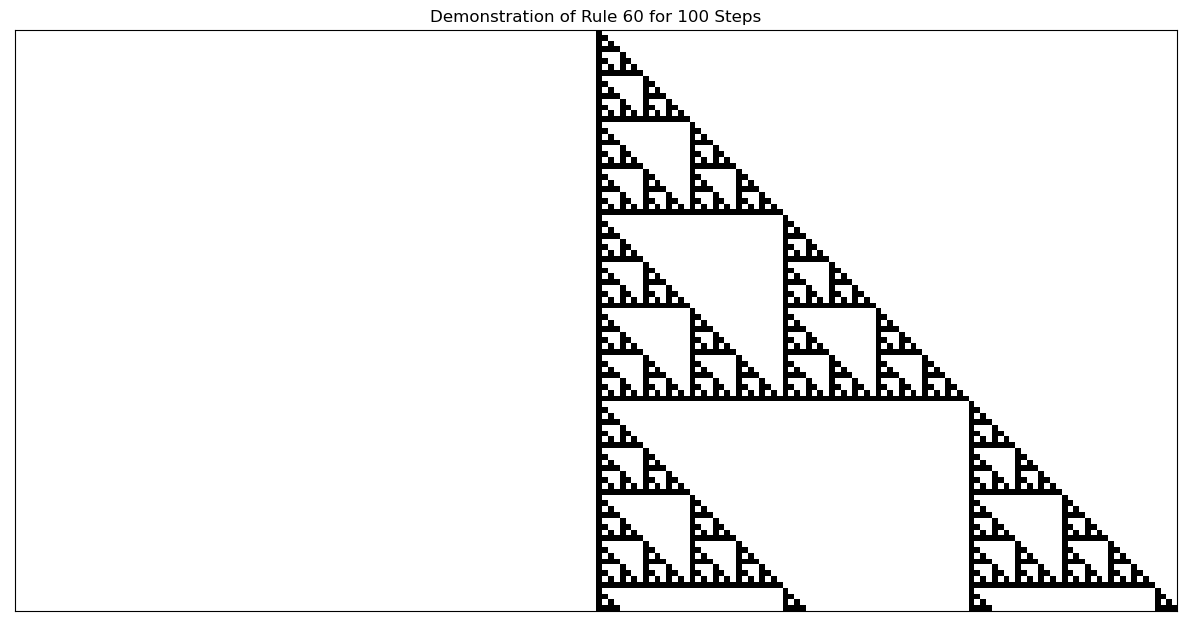

Demontration of rule 73 for 100 step


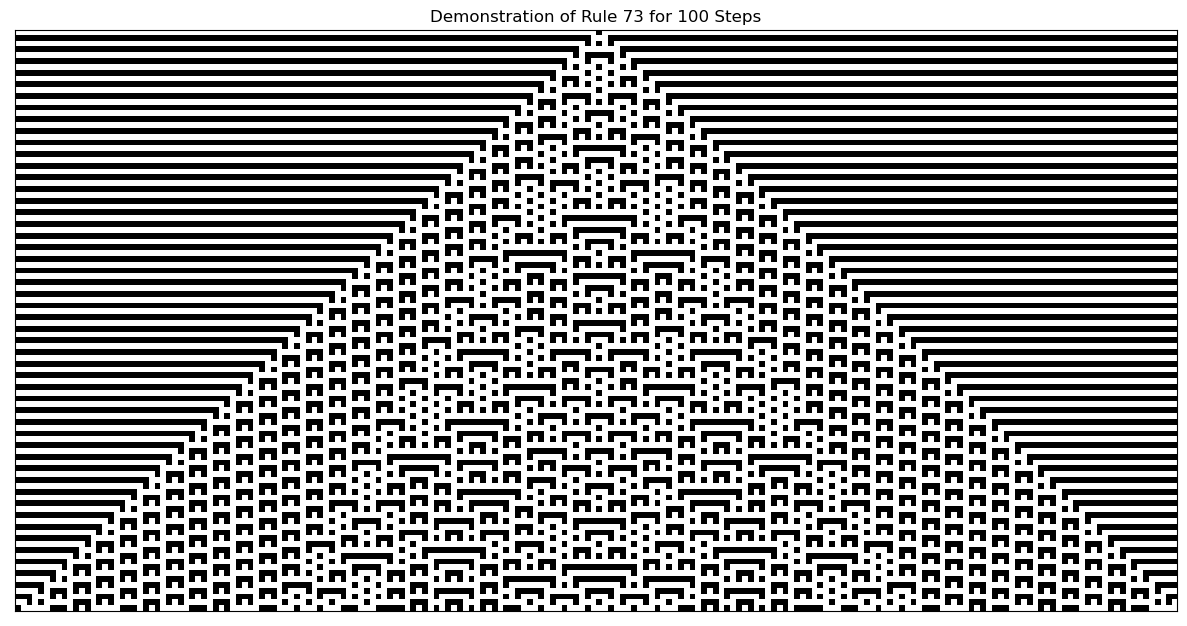

Demontration of rule 105 for 100 step


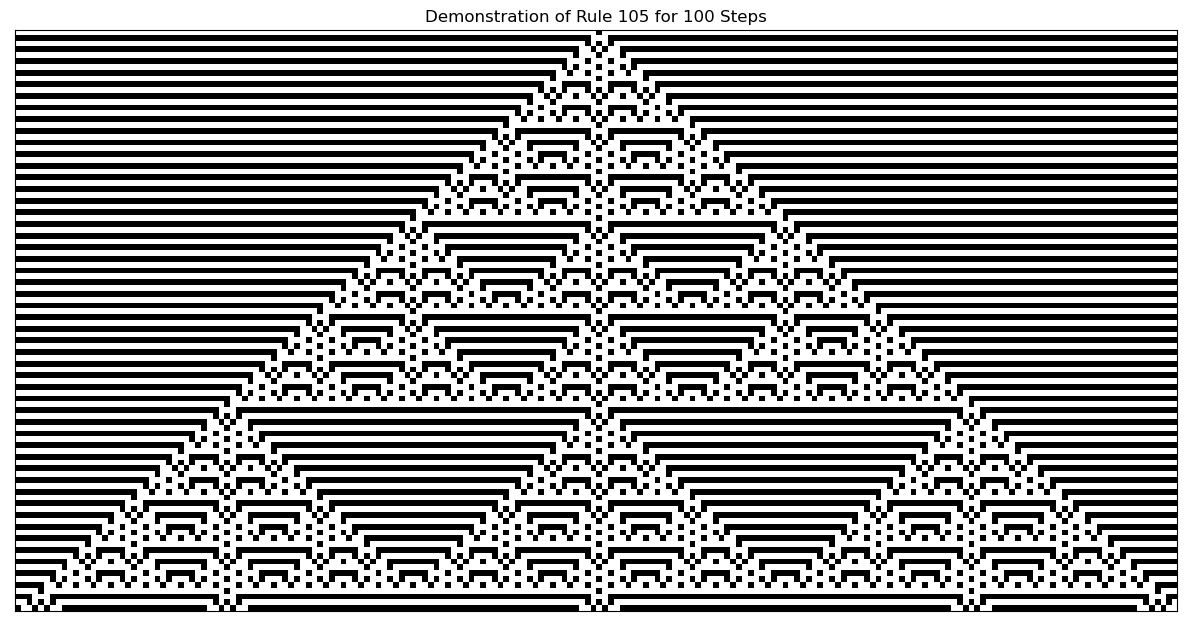

Demontration of rule 30 for 100 step


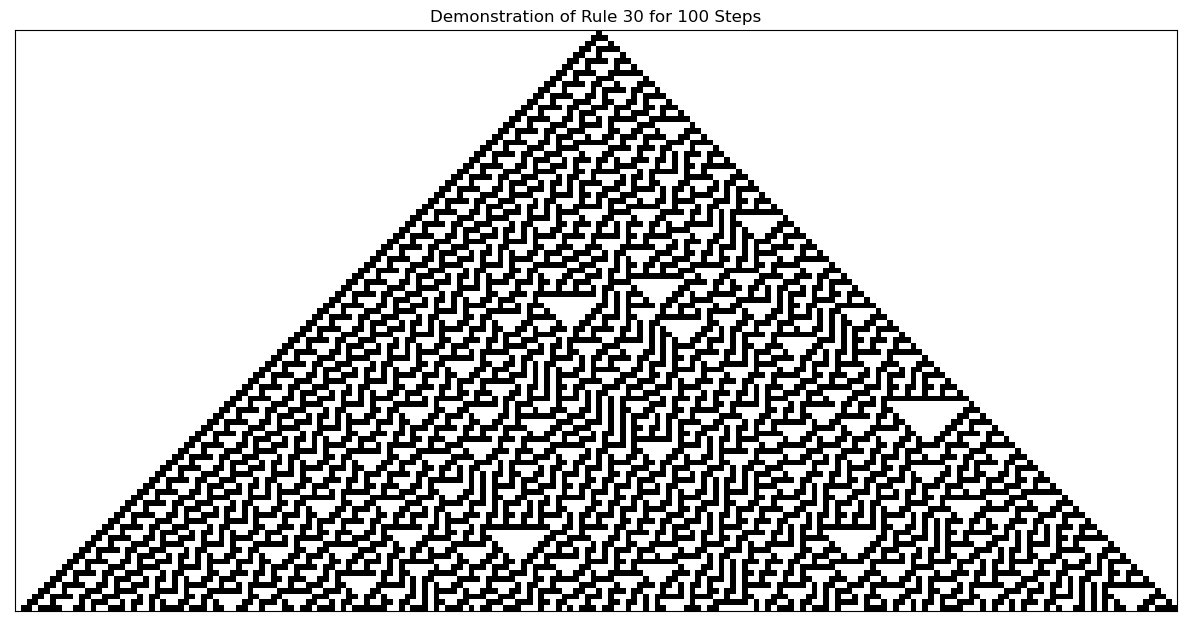

Demontration of rule 90 for 100 step


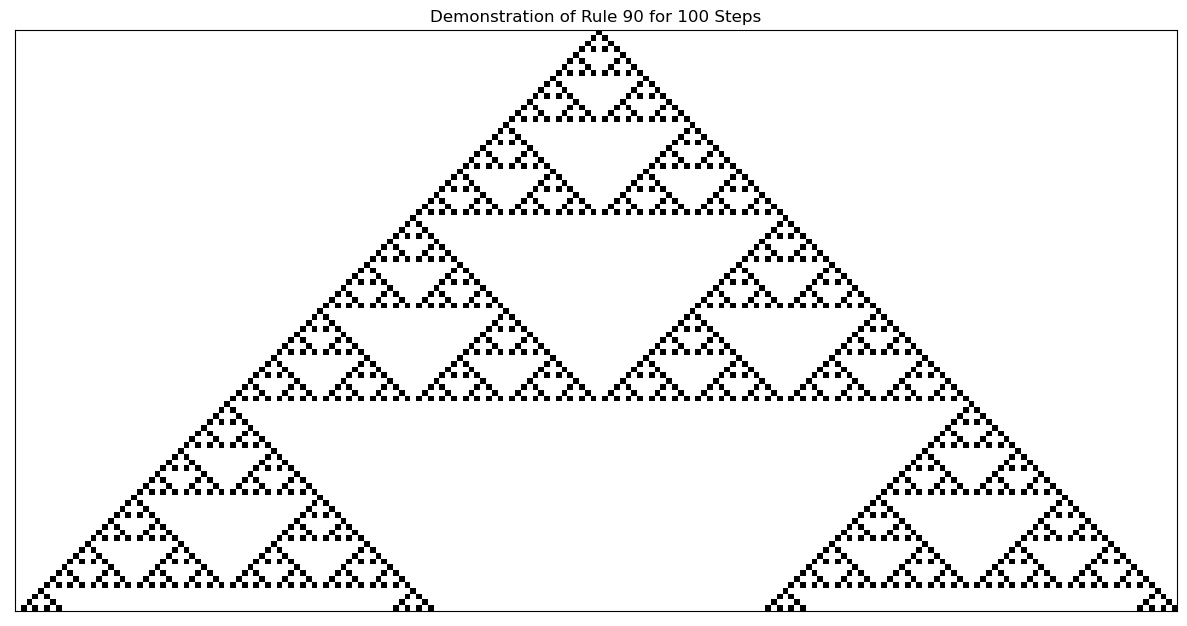

Demontration of rule 110 for 100 step


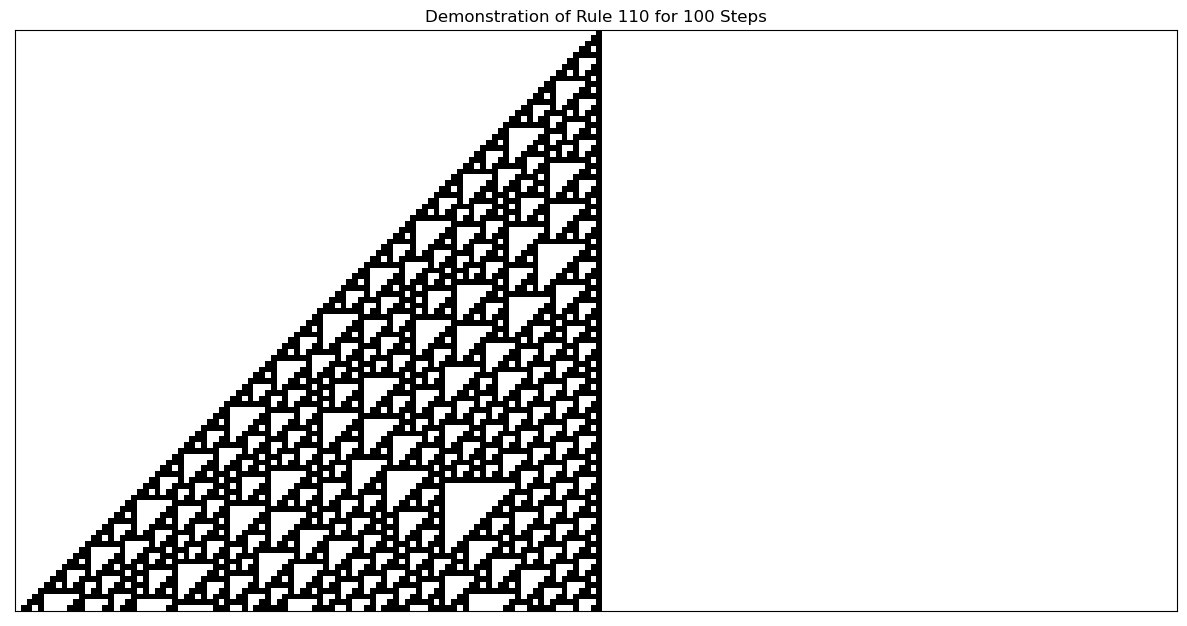

In [9]:
rules=[60, 73,105, 30, 90, 110]
step=100
for rule in rules:
    print("Demontration of rule {} for {} step".format(rule, step))
    demonstrate_ca.show_rule(rule=rule, step=step)

Rule Demonstration Between 0 and 127


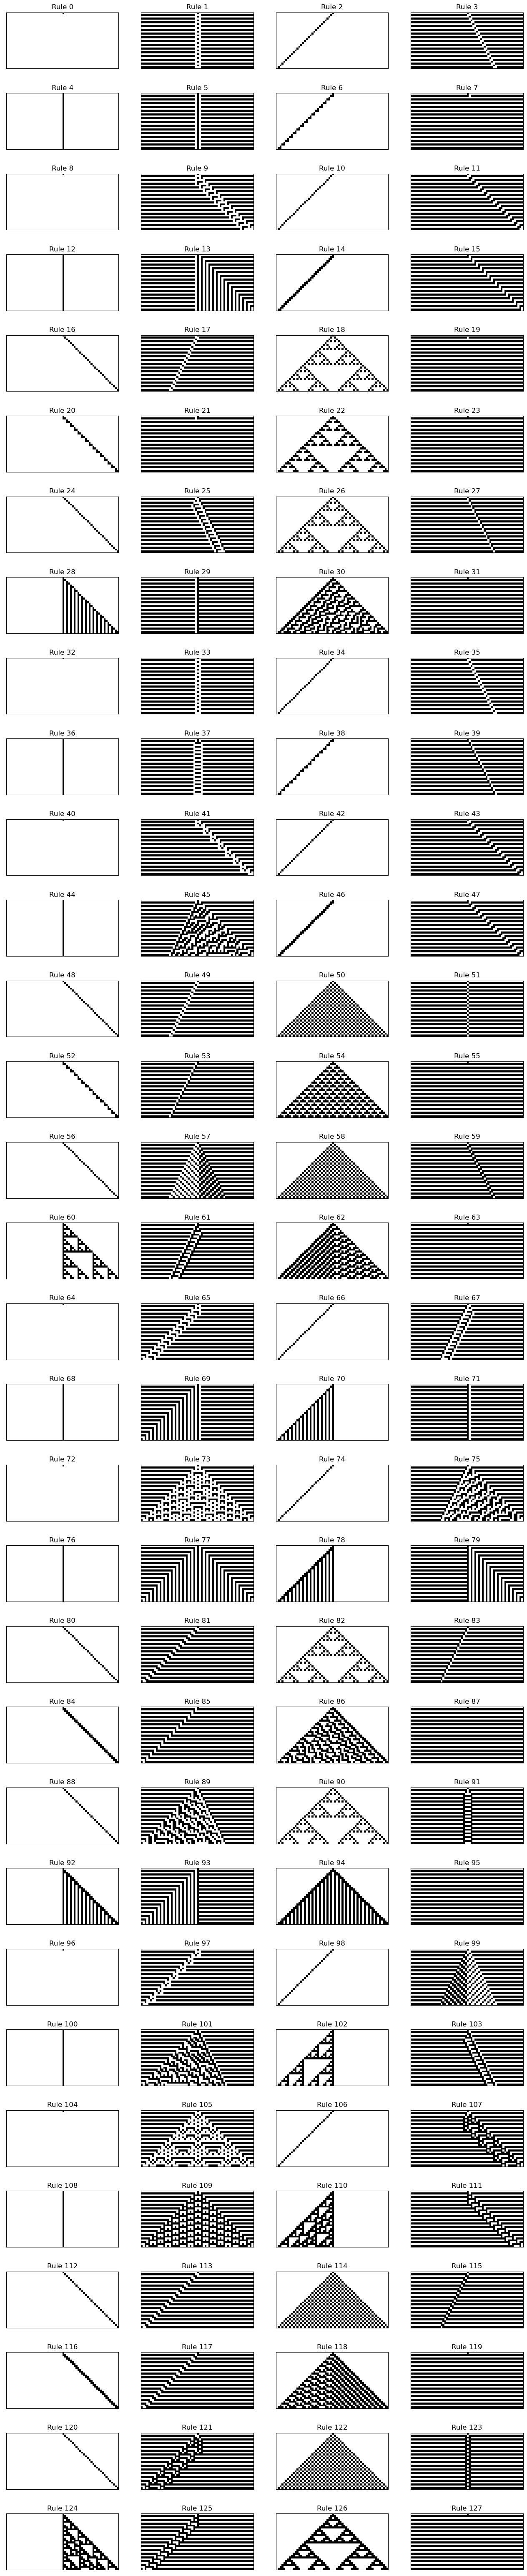

Rule Demontration Between 128 and 255


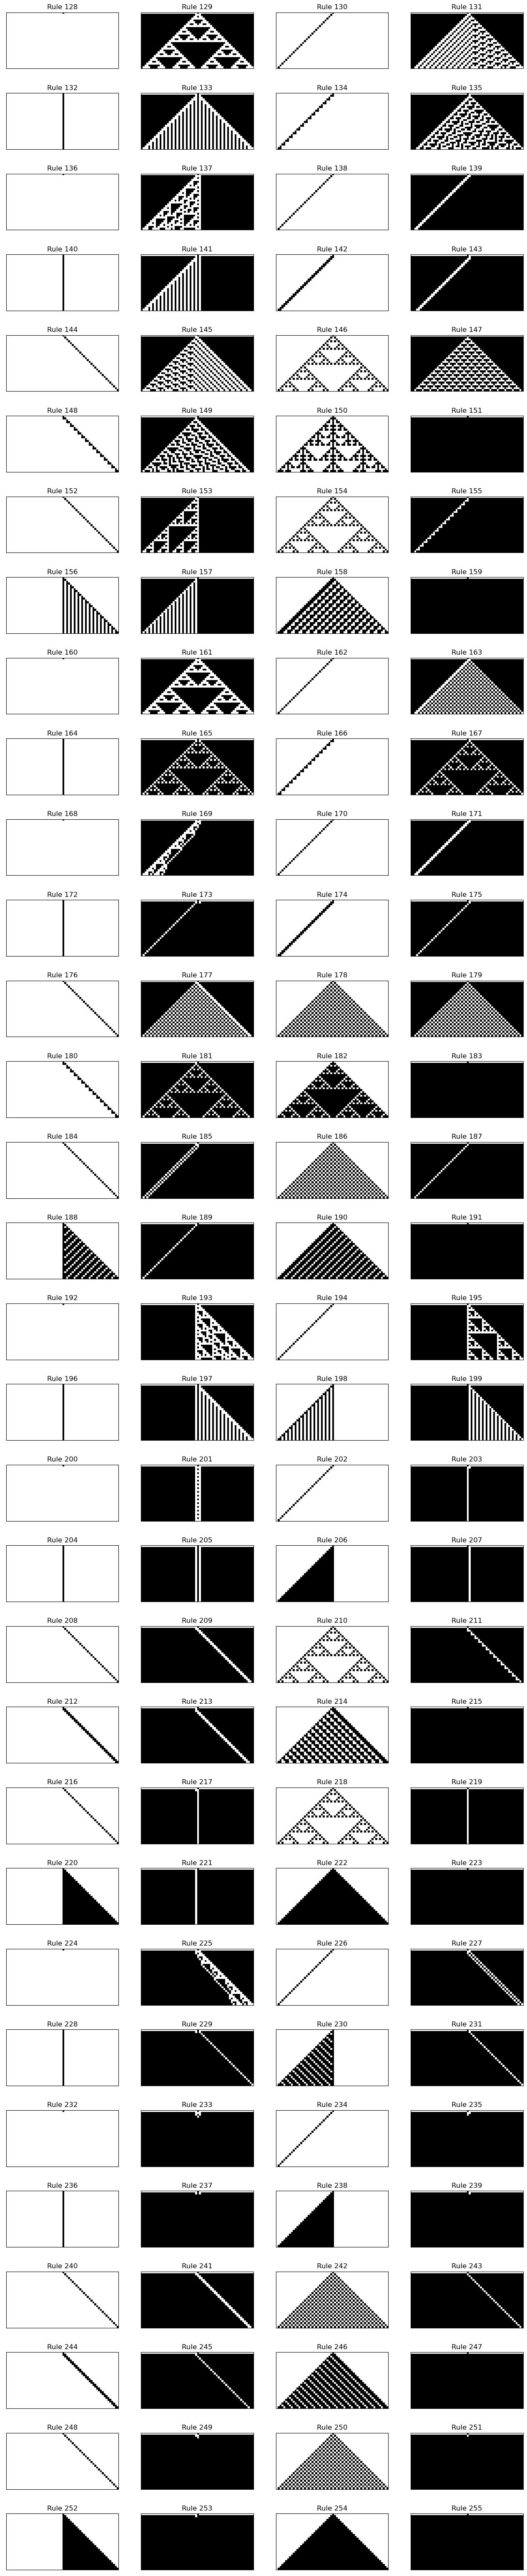

In [10]:
print("Rule Demonstration Between 0 and 127")
demonstrate_ca.show_rules_between_0_and_127()
print("Rule Demontration Between 128 and 255")
demonstrate_ca.show_rules_between_128_and_255()

[Go to Contents Menu](#0.)

<a class="anchor" id=4.>4. Totalistic Cellular Auotmata</a>

Up to this point we talked about two-state cellular automata. The number of rules that cellular automata can have is 256. Since three cells can take up to eight different states, the rule value can consist of eight bits in the binary base. This means that different 2^8  rules can be applied. There is an exponential relationship between the number of rules that can be applied and the number of neighbors. If we formulate this relationship. The number of neighbors to k and the number of states n would be the number of rules  n^(n^k). 2(2^3)= 256. 

If the number of state increases to three, what will be the result? In this case, the number of rules will be 3^(3^3) = 7 625 597 484 987". Having so much rule makes it impossible to practice. This can be reduced by taking the rules in certain conditions. Wolfram set a rule for this.

0, 1 ve 2 represented by white, gray and black in three state cellular automata demonstration. The next state of the cell is obtained according to the totals of these three cells. Accordingly, the number of rules will be 2187. Let's get a little more of how we get the number of rules. A one-dimensional cellular automaton has three neighbors, including its own, left and right cells. If these cells have a k number of values, can have 3k-2 different rules for totalistic automata. For such a case number k^3k-2 different rule is obtained. If the number of colors is 3, then the number of rules we get is 3^ 3x3-2 = 2187".

[Go to Contents Menu](#0.)


<a class="anchor" id="4.1."></a>4.1. Totalistic_CA_Grid class

In [8]:
class Totalistic_CA_Grid:

    def __init__(self, height=200, width=400, initial_number_of_black_cell=1):
        self.height = height
        self.width = width
        self.initial_number_of_black_cell = initial_number_of_black_cell
        self.grid = None


    def __initialize(self,height, width, initial_number_of_black_cell):
        self.height = height
        self.width = width
        self.grid = None
        self.initial_number_of_black_cell = initial_number_of_black_cell

    def get_grid(self):

        if self.initial_number_of_black_cell==1:
            self.__single_black_cell_grid()
        else:
            self.__multiple_black_cell_grid()

        return self.grid

    def __single_black_cell_grid(self):

        """
        This function creates matrix in heightXwidth dimensions and 
        assigns 1 to the middle cell in the top row of the matrix.

        :return:
        """
        self.grid = np.zeros((self.height, self.width), dtype=np.int32)
        self.grid[0, int(self.width / 2)] = 2




    def __multiple_black_cell_grid(self):

        """
        This function assigns a value of 1 to the desired 
        number of cells of the top row of the heightXwitdth matrix. 
        It ensures that the middle cell is 1.
        :return:
        """



        #Calling the function that assigns the value of the middle cell of the top row to 1.
        self.__single_black_cell_grid()

        """remove 1 from the self.initial_number_of_black_cell variable 
        because the value has been assigned to the middle cell"""
        n=self.initial_number_of_black_cell-1
        for i in range(n):
            random_col = np.random.randint(0, self.width)
            self.grid[0, random_col] = 2



[Go to Contents Menu](#0.)


<a class="anchor" id="4.2."></a>4.2. Totalistic_CA class

In [9]:
class Totalistic_CA(Totalistic_CA_Grid):

    def __init__(self,grid_apparence="normal",**kwargs):
        super().__init__(**kwargs)

        self.grid_apparence=grid_apparence

        self.rule=None

        self.rule_tenary=None

    def set_grid_parameters(self,
                            height,
                            width,
                            initial_number_of_black_cell=1,
                            grid_apparence="normal"):
        self.height = height
        self.width = width
        self.initial_number_of_black_cell = initial_number_of_black_cell
        
        self.grid = None
        self.grid_apparence=grid_apparence

    def __get_rule_tenary(self):
        length=7
        if self.rule==0:
            padding=length
        else:
            padding=length-len(np.base_repr(self.rule,base=3))
            
        self.rule_tenary = np.array([int(b) for b in np.base_repr(
            number=self.rule, 
            base=3,
            padding=padding)], dtype=np.int8)
        

    def generate(self, rule):

        self.rule=rule
        self.get_grid()
        self.__get_rule_tenary()

        for i in range(self.height-1):
            self.grid[i+1,:]=self.step(self.grid[i,:])

        if self.grid_apparence=='normal':
            self.grid[self.grid==2]=255
            self.grid[self.grid==1]=128
            self.grid[self.grid==0]=0
        
        if self.grid_apparence=='wolfram':
            self.grid[self.grid==1]=128
            self.grid[self.grid==0]=255
            self.grid[self.grid==2]=0
        
        return self.grid


    def __get_neighborhood_matrix(self, center):
        #vector that holds the neighbors on the left by shifting the row vector to the right
        left=np.roll(center, 1)


        #vector that holds the neighbors on the rights by shifting the row vector to the left
        right=np.roll(center, -1)
        
        neighborhood_matrix=np.vstack((left, center, right)).astype(np.int8)

        return neighborhood_matrix

    def step(self, row):
        neighborhood_matrix=self.__get_neighborhood_matrix(center=row)

        rmts=np.sum(neighborhood_matrix, axis=0)
        #print("rmts",rmts)

        return self.rule_tenary[6-rmts].astype(np.int8)

[Go to Contents Menu](#0.)


<a class="anchor" id="4.3."></a>4.3. Show  Patterns for Totalistic Rules

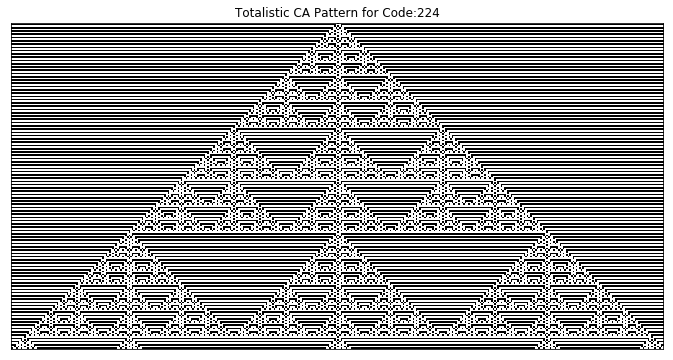

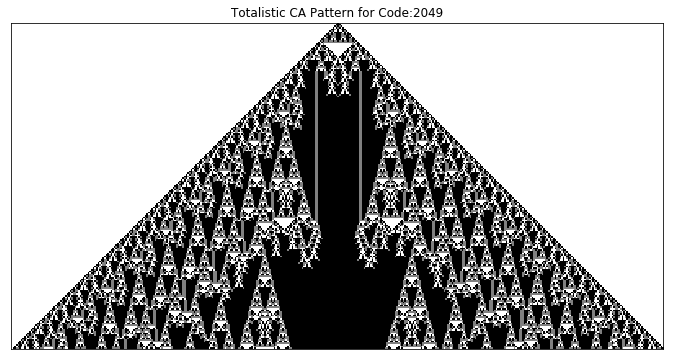

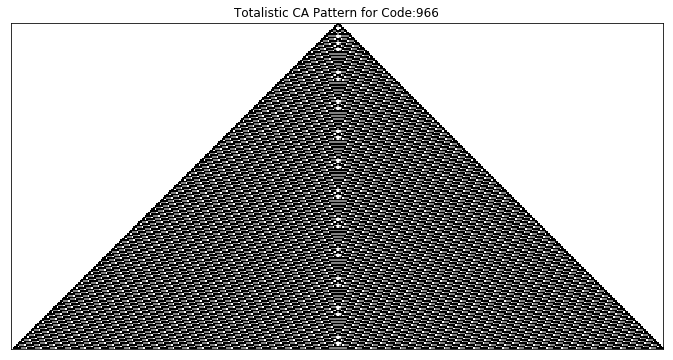

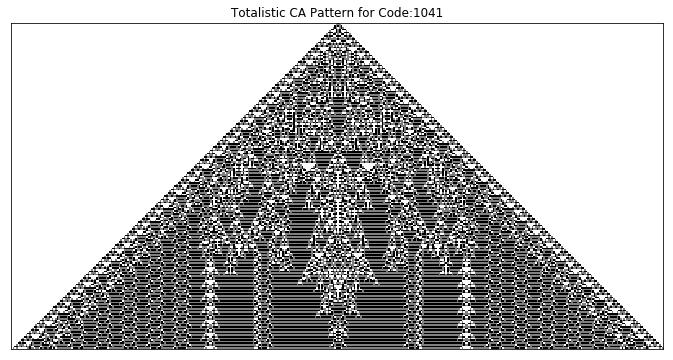

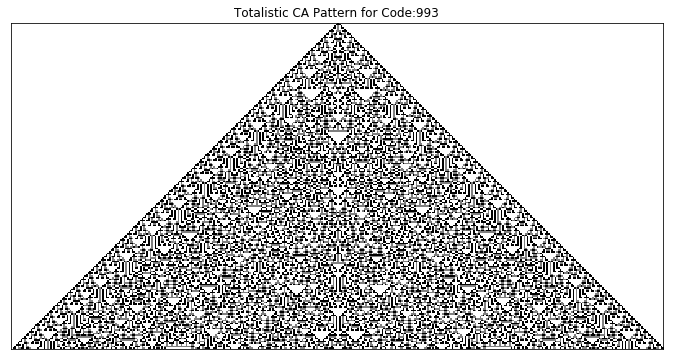

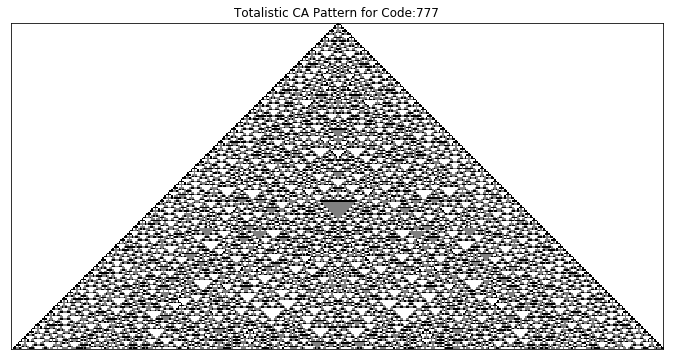

In [10]:
totalistic_rules=[224, 2049, 966, 1041, 993, 777]
for totalistic_rule in totalistic_rules:
    totalistic_ca=Totalistic_CA(grid_apparence="wolfram")
    ca_pattern=totalistic_ca.generate(totalistic_rule)
    plt.figure(figsize=(12,6))
    plt.imshow(ca_pattern,cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.title("Totalistic CA Pattern for Code:{}".format(totalistic_rule))
    plt.show()

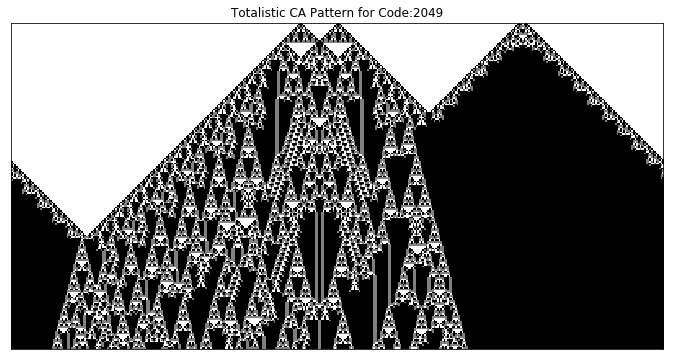

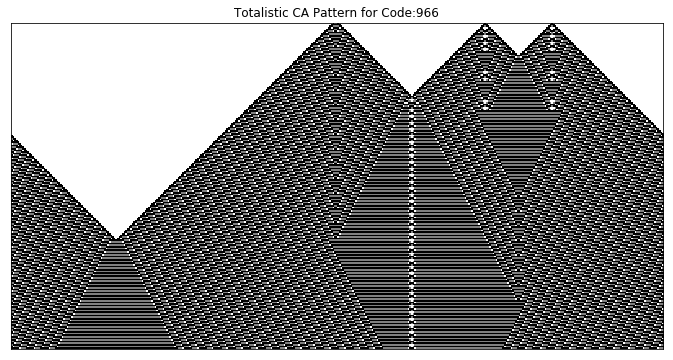

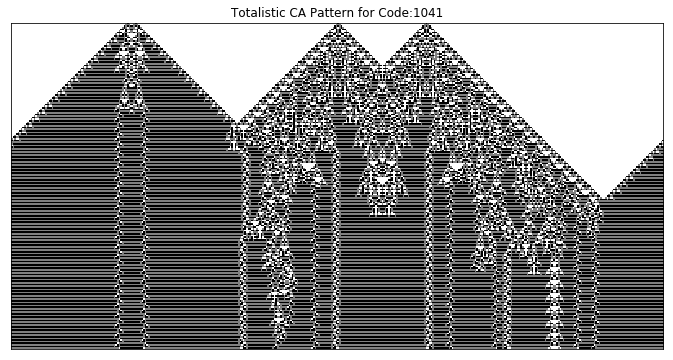

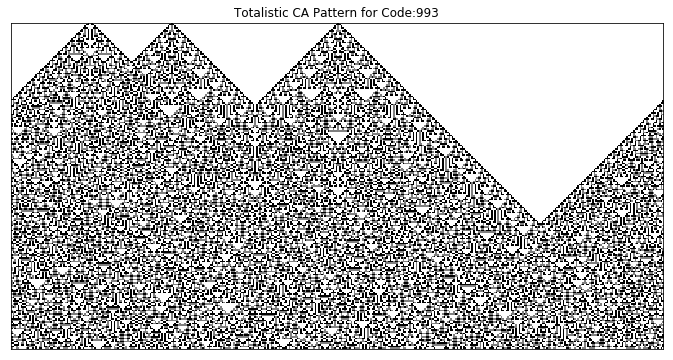

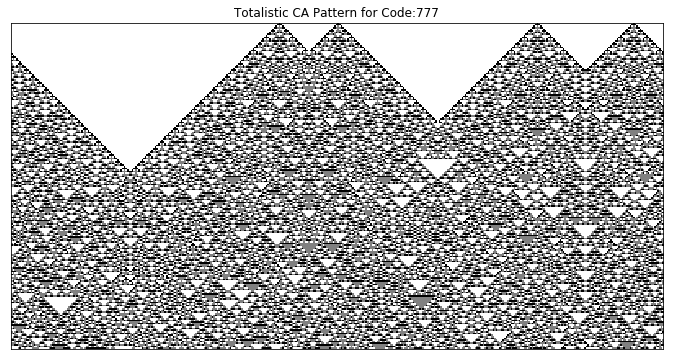

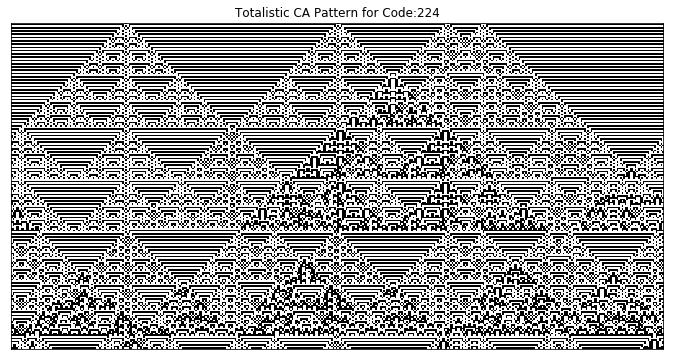

In [11]:
totalistic_rules=[2049, 966, 1041, 993, 777,224]
for totalistic_rule in totalistic_rules:
    totalistic_ca=Totalistic_CA(grid_apparence="wolfram", initial_number_of_black_cell=4)
    ca_pattern=totalistic_ca.generate(totalistic_rule)
    plt.figure(figsize=(12,6))
    plt.imshow(ca_pattern,cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.title("Totalistic CA Pattern for Code:{}".format(totalistic_rule))
    plt.show()